# Sample data acquisition skill

Let's figure out how to scrape some [data on the coronavirus from Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory).

I'd like everyone to read through this notebook and manually type all the code into your own notebook.

## Inspect the first table element

Using Chrome, go to URL:

[https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory)

and then in Chrome you can go to "View" --> "Developer" --> "View Source"

That shows you the raw HTML and what it corresponds to visually.  The next step is to use a program to extract that HTML.

## Get the raw HTML from the website

In [1]:
!pip install -q -U requests              # we need these libraries
!pip install -q -U beautifulsoup4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mapfmclient 0.2.5 requires requests~=2.25.1, but you have requests 2.30.0 which is incompatible.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.27 requires requests==2.28.1, but you have requests 2.30.0 which is incompatible.


In [2]:
import requests

CovidURL = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
response = requests.get(CovidURL)
print(response.text[0:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width

## Get specific tag using BeautifulSoup

Now let's treat the text as HTML not just English text.  Then we can ask for a specific tag such as the title:

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, "html.parser")
title = soup.find('title')
print("TITLE", title)

TITLE <title>COVID-19 pandemic by country and territory - Wikipedia</title>


##  Get all text elements from all HTML tags

We can also ask for all of the text elements not inside HTML tags:

In [4]:
print(soup.text[0:500].replace('\n', ' '))

    COVID-19 pandemic by country and territory - Wikipedia                                     Jump to content         Main menu      Main menu move to sidebar hide    		Navigation 	  Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate     		Contribute 	  HelpLearn to editCommunity portalRecent changesUpload file     Languages  Language links are at the top of the page across from the title.                    Search                Create accountLog in       Personal too


## Find all tables

BeautifulSoup has a mechanism to find all of the tables (HTML `table` text) in an HTML document:

In [5]:
tables = soup.findAll('table')

The first table looks like this on the page:
 
<img src="figures/covid-table-0.png" width="30%">

and we can get the HTML representing each table:

In [6]:
t = str(tables[0])
print(t[0:1000])

<table class="infobox"><tbody><tr><th class="infobox-above" colspan="2" style="background:#FFCCCB">COVID-19 pandemic</th></tr><tr><td class="infobox-image" colspan="2" style="border-bottom:#aaa 1px solid;"><a class="image" href="/wiki/File:COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg"><img alt="COVID-19 Outbreak World Map Total Deaths per Capita.svg" data-file-height="1398" data-file-width="2754" decoding="async" height="168" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/330px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/495px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/660px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png 2x" width="330"/>

That is raw HTML representing the table, but we can use a Jupyter notebook trick to display that text as HTML:

In [7]:
from IPython.display import HTML # IPython is the underlying Python interpreter used by this notebook
HTML(t)                          # Render the text in t as HTML

## Using Pandas to read a URL to extract tables

Pandas has a built-in mechanism to read a URL and extract all the table tags into dataframes. Extremely handy.

In [36]:
import pandas as pd
import numpy as np

tables = pd.read_html(CovidURL) # Read HTML tables into a list of DataFrame objects.

In [37]:
len(tables)

68

### Summary table

And pandas can pull that into a data frame:

In [38]:
tables[0]

,COVID-19 pandemic,COVID-19 pandemic.1
0,"Confirmed deaths per 100,000 population,[1][no...","Confirmed deaths per 100,000 population,[1][no..."
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[2][3]"
4,Location,Worldwide
5,First outbreak,China[4]
6,Index case,"Wuhan, Hubei, China .mw-parser-output .geo-def..."
7,Date,"17 November 2019[4] – present (3 years, 5 mont..."
8,Confirmed cases,"765,222,168[5]"
9,Deaths,"6,921,601[5]"


### Death rate table

The death rate per country table is `table[9]` (found by trial-and-error) and we get a nice data frame from it too:

In [93]:
df_deaths = tables[12]
df_deaths.head(10)

,Unnamed: 0,Country,Deaths / million,Deaths,Cases
0,NaN,World[a],867,6921601,765222168
1,NaN,Peru,6464,220122,4501130
2,NaN,Bulgaria,5651,38328,1304393
3,NaN,Bosnia and Herzegovina,5052,16337,402848
4,NaN,Hungary,4892,48762,2201355
5,NaN,North Macedonia,4620,9673,348142
6,NaN,Georgia,4555,17059,1840187
7,NaN,Croatia,4510,18180,1272886
8,NaN,Montenegro,4477,2808,289292
9,NaN,Slovenia,4389,9304,1343485


In [94]:
df_deaths.columns

Index(['Unnamed: 0', 'Country', 'Deaths / million', 'Deaths', 'Cases'], dtype='object')

In [95]:
df_deaths['Deaths / million'].unique()

array(['867', '6464', '5651', '5052', '4892', '4620', '4555', '4510',
       '4477', '4389', '4075', '3750', '3710', '3700', '3539', '3515',
       '3463', '3458', '3429', '3322', '3319', '3258', '3213', '3145',
       '3131', '2999', '2993', '2937', '2931', '2866', '2865', '2824',
       '2752', '2751', '2729', '2695', '2622', '2618', '2587', '2569',
       '2538', '2520', '2502', '2404', '2378', '2281', '2273', '2271',
       '2263', '2227', '2210', '2118', '2087', '2081', '2075', '2058',
       '2042', '2000', '1991', '1985', '1955', '1902', '1897', '1836',
       '1830', '1812', '1811', '1804', '1798', '1761', '1712', '1697',
       '1679', '1649', '1605', '1604', '1601', '1593', '1574', '1565',
       '1556', '1515', '1511', '1454', '1453', '1445', '1372', '1356',
       '1355', '1322', '1309', '1306', '1267', '1251', '1250', '1192',
       '1188', '1185', '1131', '1090', '1087', '1082', '1065', '1062',
       '1057', '1043', '1017', '1011', '1000', '988', '983', '964', '949',
   

In [96]:
df_deaths.tail()

,Unnamed: 0,Country,Deaths / million,Deaths,Cases
235,NaN,Tuvalu,—,NaN,2779
236,NaN,Tokelau,—,0,5
237,NaN,Niue,—,NaN,747
238,NaN,"Saint Helena, Ascension and Tristan da Cunha",—,NaN,2166
239,.mw-parser-output .reflist{font-size:90%;margi...,.mw-parser-output .reflist{font-size:90%;margi...,.mw-parser-output .reflist{font-size:90%;margi...,.mw-parser-output .reflist{font-size:90%;margi...,.mw-parser-output .reflist{font-size:90%;margi...


In [97]:
df_deaths = df_deaths[0:239].copy()

As with any data frame, we can sort values and select columns of interest:

In [98]:
df_death_rate = df_deaths[['Country', 'Deaths / million']].sort_values('Deaths / million', ascending=False)
df_death_rate.head(10)

,Country,Deaths / million
238,"Saint Helena, Ascension and Tristan da Cunha",—
237,Niue,—
236,Tokelau,—
235,Tuvalu,—
234,Falkland Islands,—
233,Pitcairn Islands,—
232,Turkmenistan,—
231,Vatican City,—
111,Azerbaijan,988
112,Kazakhstan,983


In [99]:
character = df_death_rate['Deaths / million'].values[0]

In [100]:
df_death_rate['Deaths / million'] = df_death_rate['Deaths / million'].replace(character, np.nan)
df_death_rate['Deaths / million'] = df_death_rate['Deaths / million'].astype(float)

In [101]:
df_death_rate['Deaths / million'] = df_death_rate['Deaths / million'].replace(character, np.nan)
df_death_rate_2 = df_death_rate[['Country', 'Deaths / million']].sort_values('Deaths / million', ascending=False)

In [102]:
df_death_rate_2.head(10)

,Country,Deaths / million
1,Peru,6464.0
2,Bulgaria,5651.0
3,Bosnia and Herzegovina,5052.0
4,Hungary,4892.0
5,North Macedonia,4620.0
6,Georgia,4555.0
7,Croatia,4510.0
8,Montenegro,4477.0
9,Slovenia,4389.0
10,Czech Republic,4075.0


Once we have a nice data structure like a data frame, it's very easy to build a plot, which is sometimes more satisfying than what we see in some report where we got the data.

In [103]:
df_deaths['Deaths'] = df_deaths['Deaths'].replace(character, np.nan).astype(float)

df = df_deaths.sort_values('Deaths', ascending=False)
df = df.head(30)
df

,Unnamed: 0,Country,Deaths / million,Deaths,Cases
0,NaN,World[a],867,6921601.0,765222168
34,NaN,European Union[b],2729,1228666.0,183867312
19,NaN,United States,3322,1124063.0,103266404
21,NaN,Brazil,3258,701494.0,37449418
153,NaN,India,375,531564.0,44952996
32,NaN,Russia,2752,398366.0,22858855
37,NaN,Mexico,2618,333908.0,7587447
20,NaN,United Kingdom,3319,224106.0,24581706
1,NaN,Peru,6464,220122.0,4501130
22,NaN,Italy,3213,189738.0,25788387


In [114]:
df_deaths['Deaths'] = df_deaths['Deaths'].replace(character, np.nan).astype(float)
df = df_deaths.sort_values('Deaths', ascending=False)
df = df.head(30)
df

,Unnamed: 0,Country,Deaths / million,Deaths,Cases
0,NaN,World[a],867,6921601.0,765222168
34,NaN,European Union[b],2729,1228666.0,183867312
19,NaN,United States,3322,1124063.0,103266404
21,NaN,Brazil,3258,701494.0,37449418
153,NaN,India,375,531564.0,44952996
32,NaN,Russia,2752,398366.0,22858855
37,NaN,Mexico,2618,333908.0,7587447
20,NaN,United Kingdom,3319,224106.0,24581706
1,NaN,Peru,6464,220122.0,4501130
22,NaN,Italy,3213,189738.0,25788387


In [115]:
# cut the World and the European union
df = df.iloc[2:].copy()
countries = df['Country']
deaths = df['Deaths']

In [ ]:
for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

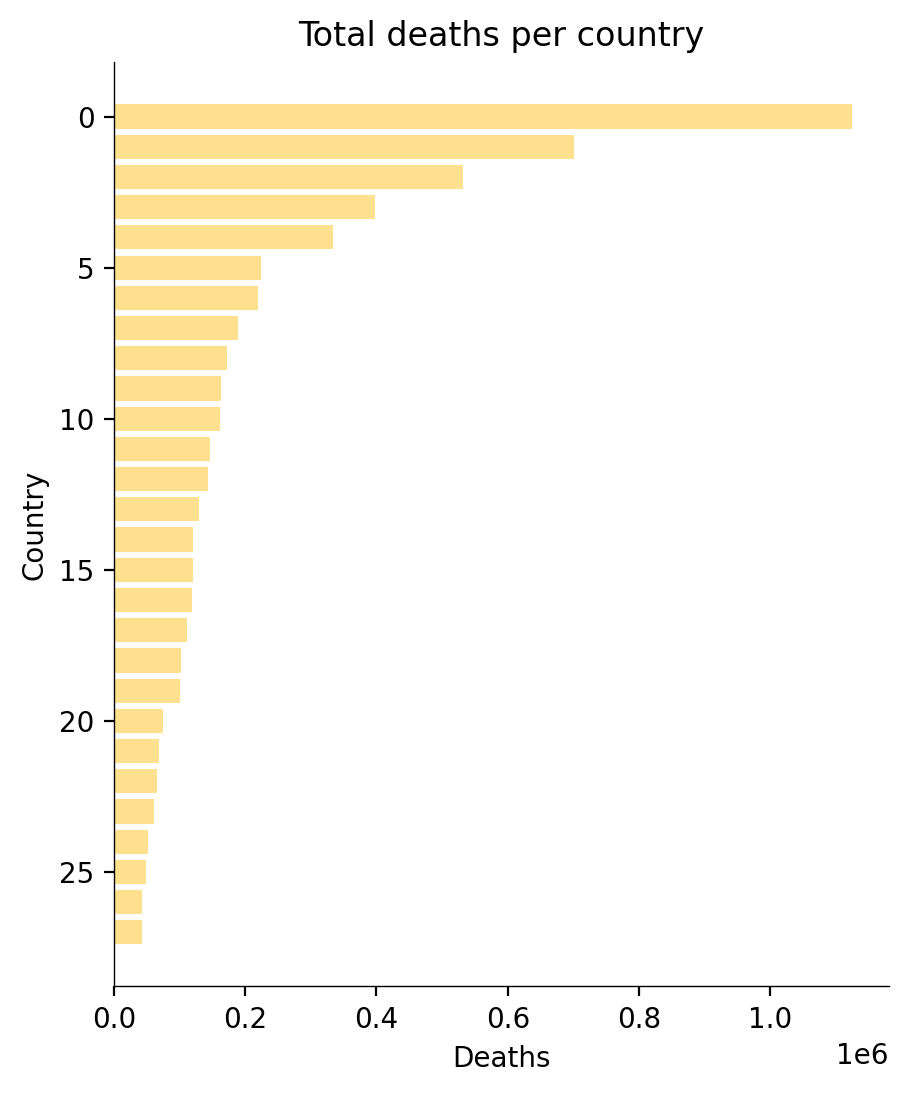

In [124]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(1, 1, figsize=(5,6))
y_pos = np.arange(len(countries))
barcontainers = ax.barh(y_pos, deaths, color='#FEE08F')
ax.invert_yaxis() 
#ax.set_xticks(countries)
#ax.set_xticklabels(countries, rotation=45, fontsize=8, horizontalalignment="right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_title("Total deaths per country")
ax.set_xlabel("Deaths")
ax.set_ylabel("Country")

plt.show()

Ok, well hopefully that was fun and gives you some idea of what we can do with just a few simple skills.